### Regression

Regression analysis is a form of predictive modelling technique which investigates the relationship between a dependent (target) and independent variable (s) (predictor). This technique is used for forecasting, time series modelling and finding the causal effect relationship between the variables.
- For example, relationship between rash driving and number of road accidents by a driver is best studied through regression.
- There are multiple benefits of using regression analysis. They are as follows:
  - It indicates the significant relationships between dependent variable and independent variable.
  - It indicates the strength of impact of multiple independent variables on a dependent variable.

#### Types

There are different types of regression:

- Simple Linear Regression: Simple linear regression is a target variable based on the independent variables. Linear regression is a machine learning algorithm based on supervised learning which performs the regression task.

- Polynomial Regression: Polynomial regression transforms the original features into polynomial features of a given degree or variable and then apply linear regression to it.

- Support Vector Regression: Support vector regression identifies a hyperplane with the maximum margin such that the maximum number of data points is within the margin.
- Decision Tree Regression: The decision tree is a tree that is built by partitioning the data into subsets containing instances with similar values. It can use for regression and classification also.
- Random Forest Regression: Random forest is an ensemble approach where we take into account the predictions of several decision regression trees.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../datasets/life_expectancy_data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [15]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [16]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [18]:
df['Life expectancy '].fillna(df['Life expectancy '].mean(),inplace=True)
df['Alcohol'].fillna(df['Alcohol'].mean(),inplace=True)
df[' BMI '].fillna(df[' BMI '].mean(),inplace=True)

In [19]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                     10
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [22]:
df[['Life expectancy ','Alcohol',' BMI ','percentage expenditure','Adult Mortality']].corr()

,Life expectancy,Alcohol,BMI,percentage expenditure,Adult Mortality
Life expectancy,1.000000,0.391598,0.559255,0.381791,-0.696359
Alcohol,0.391598,1.000000,0.318070,0.339634,-0.190799
BMI,0.559255,0.318070,1.000000,0.228537,-0.383592
percentage expenditure,0.381791,0.339634,0.228537,1.000000,-0.242860
Adult Mortality,-0.696359,-0.190799,-0.383592,-0.242860,1.000000


In [23]:
x = df[['Alcohol',' BMI ','percentage expenditure']]
y = df['Life expectancy ']

In [36]:
x.shape
y.shape

(2938,)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [37]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=40)

In [38]:
lin_reg = LinearRegression()

In [39]:
xtrain.shape

(2203, 3)

In [40]:
ytrain.shape

(2203,)

In [41]:
lin_reg.fit(xtrain,ytrain)

LinearRegression()

In [42]:
ypredict = lin_reg.predict(xtest)

In [46]:
from sklearn.metrics import r2_score

In [47]:
r2_score(ytest,ypredict)

0.4267146406861513

### House price prediction

In [48]:
df1 = pd.read_csv("../datasets/Real estate.csv")
df1.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [50]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
No,414.0,207.500000,119.655756,1.00000,104.250000,207.50000,310.750000,414.00000
X1 transaction date,414.0,2013.148971,0.281967,2012.66700,2012.917000,2013.16700,2013.417000,2013.58300
X2 house age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
X3 distance to the nearest MRT station,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
X4 number of convenience stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
X5 latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
X6 longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
Y house price of unit area,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000


In [51]:
df1.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [52]:
df1.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [54]:
df1[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','Y house price of unit area']].corr()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
X2 house age,1.000000,0.025622,0.049593,-0.210567
X3 distance to the nearest MRT station,0.025622,1.000000,-0.602519,-0.673613
X4 number of convenience stores,0.049593,-0.602519,1.000000,0.571005
Y house price of unit area,-0.210567,-0.673613,0.571005,1.000000


In [74]:
x_var = df1[['X4 number of convenience stores']].tail(20)
y_var = df1['Y house price of unit area'].tail(20)

In [75]:
lin_reg.fit(x_var,y_var)

LinearRegression()

In [76]:
y_predict = lin_reg.predict(x_var)

In [77]:
r2_score(y_var,y_predict)

0.6309007353629821

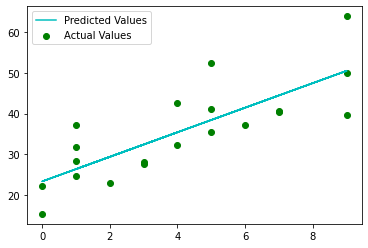

In [78]:
plt.scatter(x_var, y_var, color = 'g', 
            label = 'Actual Values')
plt.plot(x_var, y_predict, color = 'c', 
         label = 'Predicted Values')
plt.legend()
plt.show()

## Theory

- **Linear regression** helps in interpolating the value of an unknown variable (a continuous 
variable) based on a known value.
- A dependent variable is the value that we are predicting for, and an independent variable 
is the variable that we are using to predict a dependent variable
- R squared is a measure of correlation between forecasted and actual values.

### Common Pitfalls

- When the dependent and independent variables are not linearly related 
with each other throughout
- When there is an outlier among the values within independent 
variables

**Multicollinearity** : One of the major issues to take care of while building a multivariate model is when 
the independent variables may be related to each other. This phenomenon is called 
multicollinearity

#### Assumptions of Linear Regression

- The independent variables must be linearly related to dependent 
variable
- There should not be any outliers in values among independent 
variables
- Error values should be independent of each other
- **Homoscedasticity**: Errors cannot get larger as the value of an 
independent variable increases. Error distribution should look more 
like a cylinder than a cone in linear regression

-  Errors should be normally distributed: There should be only a few 
data points that have high error. A majority of data points should have 
low error, and a few data points should have positive and negative 
error—that is, errors should be normally distributed